 # Opis notatnika
 W tym notatniku dokonam analizę oraz eksplorację danych.
 W bazie danych `flight`, zmienna `dep_delay` informuje o wysokości opóźnienia odlotu samolotu.

 # Konfiguracja

In [1]:
import pandas as pd
import psycopg2
import matplotlib as plt
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

In [2]:
username = ''
password = ''

host = 'localhost'
database = 'airlines'
port = 5432

try:
    con = psycopg2.connect(user=username, password=password, host=host, database=database)
    cursor = con.cursor()
    print("Połączenie z bazą danych udane!")
except psycopg2.Error as e:
    print(f"Błąd połączenia: {e}")

Połączenie z bazą danych udane!


In [3]:
url = f"postgresql://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(url)

Implementacja metody `read_sql_table`

In [4]:
def read_sql_table(table_name):
    df = pd.read_sql(table_name, con = engine)
    return df

 # Wczytanie danych do obszaru roboczego
Usuwam z ramki loty, które odbyły się w 2020 roku i zostały anulowane.  

In [5]:
flight_df_raw = read_sql_table('flight')

In [6]:
flight_df_raw.query("cancelled != 1")

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386111,1386112,3,26,4,DL,N331NW,1460,13303,10397,1328,...,119.0,115.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
1386114,1386115,3,26,4,DL,N901DE,1795,13303,10397,1458,...,115.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020
1386115,1386116,3,26,4,DL,N350DN,1982,13303,12953,1956,...,183.0,169.0,1096.0,5,NaN,NaN,NaN,NaN,NaN,2020
1386116,1386117,3,26,4,DL,N908DE,1987,13303,10397,1120,...,121.0,109.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2020


In [7]:
flight_df_raw = flight_df_raw.loc[(flight_df_raw['year']!=2020) & (flight_df_raw['cancelled']!=1)]
flight_df_raw

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,210.0,205.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,210.0,220.0,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,205.0,204.0,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,120.0,124.0,581.0,3,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382982,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,121.0,114.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019
1382983,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,177.0,178.0,1096.0,5,5.0,0.0,19.0,0.0,0.0,2019
1382984,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,118.0,97.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2019
1382985,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,180.0,196.0,1096.0,5,0.0,0.0,66.0,0.0,0.0,2019


Zmiana nazwy kolumny `dep_delay_new` na `dep_delay`

In [8]:
flight_df_raw.rename(columns={'dep_delay_new':'dep_delay'}, inplace=True)
flight_df = flight_df_raw

 # Analiza kolumny `dep_delay` cz. 1
 Wyznaczenie statystyki opisowe dla zmiennej `dep_delay`

In [15]:
dep_delay_statistics_df = flight_df['dep_delay'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2)
dep_delay_statistics_df 

 # Analiza kolumny `dep_delay` cz. 2

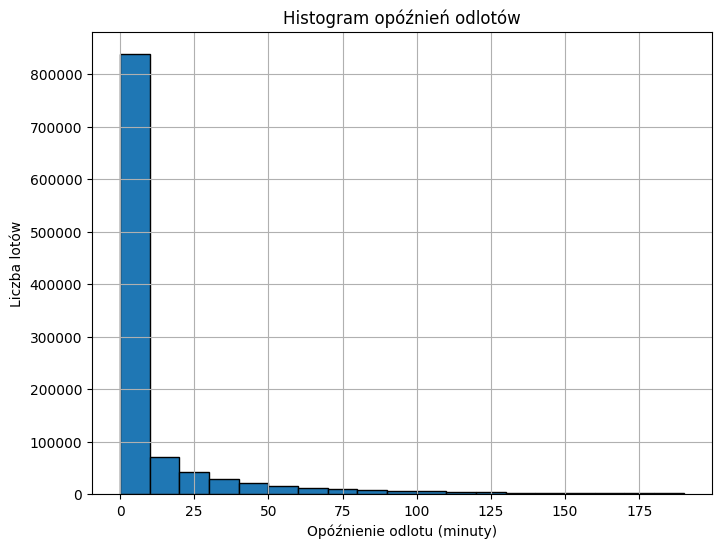

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(flight_df['dep_delay'], bins=range(0, 200, 10), edgecolor='black')
plt.xlabel('Opóźnienie odlotu (minuty)')
plt.ylabel('Liczba lotów')
plt.title('Histogram opóźnień odlotów')
plt.grid(True)
plt.show()

Wykres dla `dep_delay` dla warunku `dep_delay > 0`

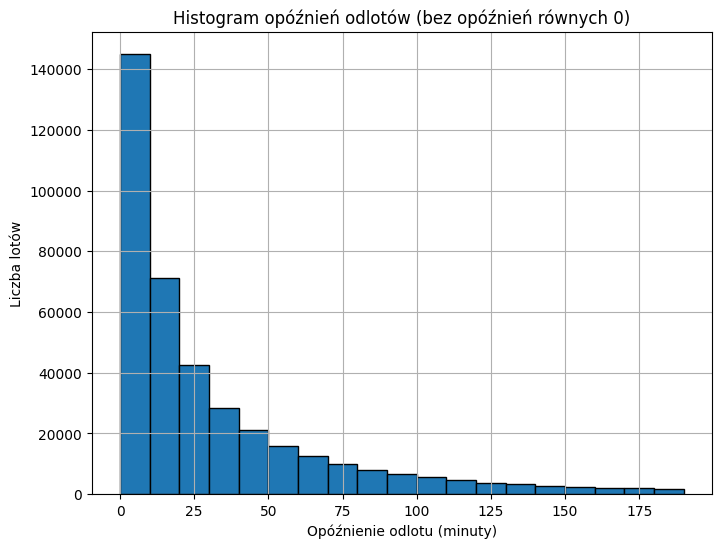

In [18]:
non_zero_dep_delay = flight_df[flight_df['dep_delay'] != 0]

plt.figure(figsize=(8, 6))
plt.hist(non_zero_dep_delay['dep_delay'], bins=range(0, 200, 10), edgecolor='black')
plt.xlabel('Opóźnienie odlotu (minuty)')
plt.ylabel('Liczba lotów')
plt.title('Histogram opóźnień odlotów (bez opóźnień równych 0)')
plt.grid(True)
plt.show()

Wykres `dep_delay` dla warunków `dep_delay > 0` oraz `dep_delay < percentile 95%`

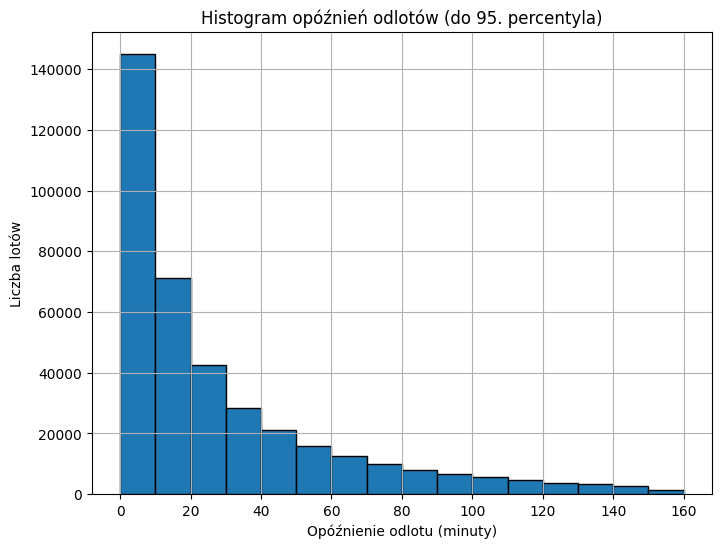

In [19]:
percentile_95 = non_zero_dep_delay['dep_delay'].quantile(0.95)
filtered_dep_delay = non_zero_dep_delay[non_zero_dep_delay['dep_delay'] <= percentile_95]

plt.figure(figsize=(8, 6))
plt.hist(filtered_dep_delay['dep_delay'], bins=range(0, int(percentile_95) + 10, 10), edgecolor='black')
plt.xlabel('Opóźnienie odlotu (minuty)')
plt.ylabel('Liczba lotów')
plt.title('Histogram opóźnień odlotów (do 95. percentyla)')
plt.grid(True)
plt.show()

 # Analiza opóźnień
Nową kolumnę - `is_delayed` = opóźnienia > 15 minut.

In [20]:
flight_df['is_delayed'] = flight_df['dep_delay'] > 15

# apply.> True lub False do kolumny "is_delayed"
flight_df['is_delayed'] = flight_df['is_delayed'].apply(lambda x: True if x else False)

In [21]:
flight_df.columns

Index(['id', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier',
       'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_time_blk', 'crs_arr_time',
       'arr_time', 'arr_delay_new', 'arr_time_blk', 'cancelled',
       'crs_elapsed_time', 'actual_elapsed_time', 'distance', 'distance_group',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'year', 'is_delayed'],
      dtype='object')

Obliczenie stosunku opoznionych lotów do wszystkich lotów = `delayed_ratio`

In [22]:
total_flights = len(flight_df)
delayed_flights = flight_df['is_delayed'].sum()
delayed_ratio = round((delayed_flights / total_flights),2)
delayed_ratio

 # Opóźnienia vs. miesiąc kalendarzowy

In [24]:
flight_delays_by_month_df = flight_df.groupby(flight_df['month'])['is_delayed'].mean()

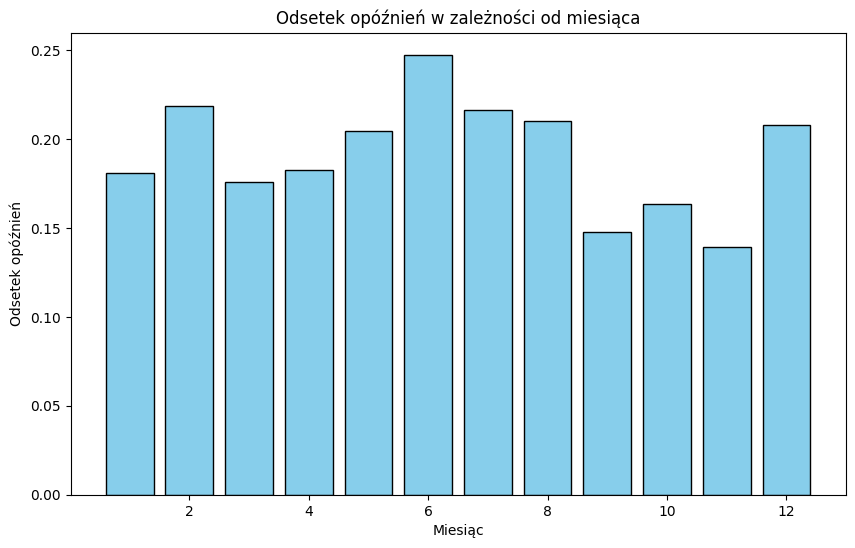

In [25]:
plt.figure(figsize=(10, 6))

plt.bar(flight_delays_by_month_df.index, flight_delays_by_month_df.values, color='skyblue', edgecolor='black')

plt.xlabel('Miesiąc')
plt.ylabel('Odsetek opóźnień')
plt.title('Odsetek opóźnień w zależności od miesiąca')

plt.show()

 # Opóźnienia vs. dzień tygodnia cz. 1

In [26]:
flight_delays_by_weekday_df = flight_df.groupby(flight_df['day_of_week'])['is_delayed'].mean()
flight_delays_by_weekday_df

day_of_week
1    0.201266
2    0.174751
3    0.182782
4    0.212168
5    0.203227
6    0.167831
7    0.192409
Name: is_delayed, dtype: float64

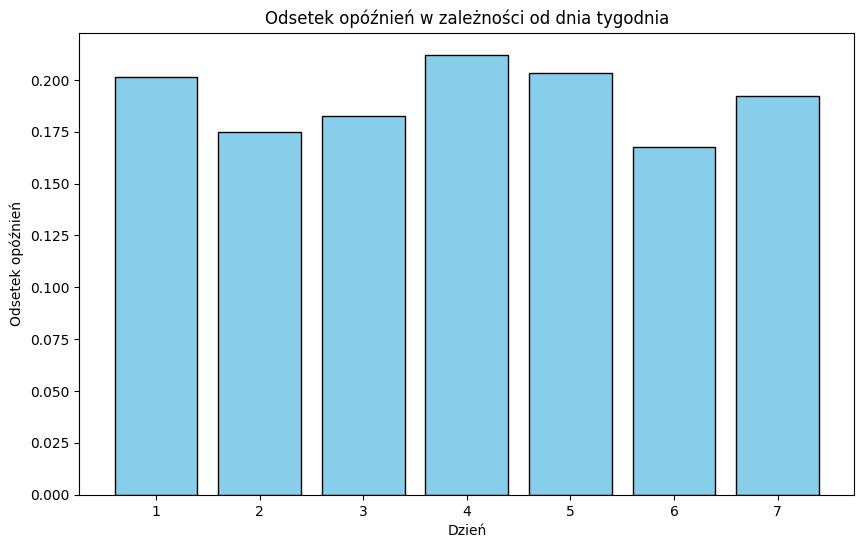

In [27]:
plt.figure(figsize=(10, 6))

plt.bar(flight_delays_by_weekday_df.index, flight_delays_by_weekday_df.values, color='skyblue', edgecolor='black')

plt.xlabel('Dzień')
plt.ylabel('Odsetek opóźnień')
plt.title('Odsetek opóźnień w zależności od dnia tygodnia')

plt.show()

 # Opóźnienia vs. dzień tygodnia cz. 2
 Wizualizacja opóźnień w zależności czy odbywają się w weekend czy nie

In [28]:
flight_df['is_weekend'] = flight_df['day_of_week'].isin([6, 7])
flight_df.head()

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,1199.0,5,4.0,0.0,10.0,0.0,3.0,2019,False,True
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,1199.0,5,NaN,NaN,NaN,NaN,NaN,2019,False,True
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,581.0,3,NaN,NaN,NaN,NaN,NaN,2019,False,True


In [29]:
flight_delays_by_weekend_df = flight_df.groupby('is_weekend')['is_delayed'].mean().round(2)
flight_delays_by_weekend_df

is_weekend
False    0.19
True     0.18
Name: is_delayed, dtype: float64

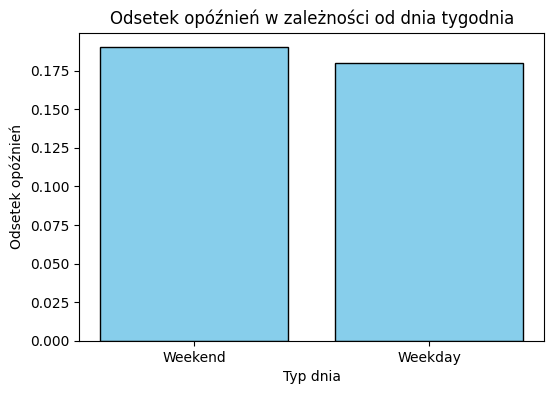

In [30]:
plt.figure(figsize=(6, 4))

plt.bar(['Weekend', 'Weekday'], flight_delays_by_weekend_df.values, color='skyblue', edgecolor='black')

plt.xlabel('Typ dnia')
plt.ylabel('Odsetek opóźnień')
plt.title('Odsetek opóźnień w zależności od dnia tygodnia')

plt.show()

# wnioski:  
Na podstawie analizy wykresu możemy zauważyć, że odsetek opóźnień jest nieco wyższy w weekendy niż w dni powszednie. 
To może wynikać z większego ruchu pasażerskiego i innych czynników wpływających na operacje lotnicze w weekendy. 
Jednak różnica nie jest znacząca, więc nie można jednoznacznie stwierdzić, że odsetek opóźnień jest silnie zależny od dnia tygodnia. 
Wartości te mogą się różnić w zależności od konkretnego lotniska, linii lotniczej i innych czynników.

 # Opóźnienia vs. odległość lotu

In [33]:
percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

flight_distance_analysis_df = round(flight_df['distance'].describe(percentiles=percentiles), 2)
flight_distance_analysis_df

count    1095742.00
mean         758.08
std          600.43
min          100.00
10%          216.00
25%          337.00
50%          606.00
75%          937.00
90%         1721.00
95%         2475.00
99%         2586.00
max         2586.00
Name: distance, dtype: float64

Wykres dla 10 000 losowych wierszy z tabeli `flight_df`

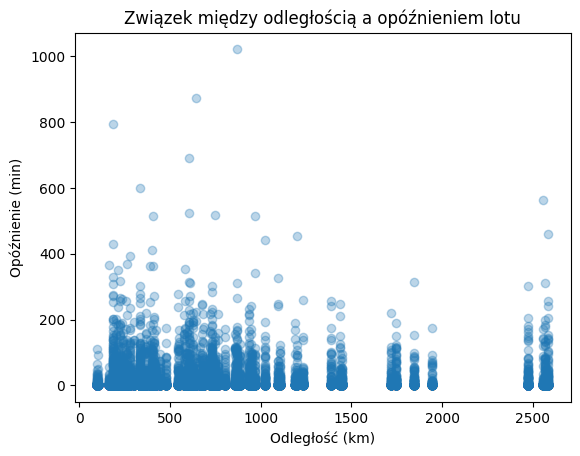

In [34]:
sampled_data = flight_df.sample(n=10000, random_state=42)

plt.scatter(sampled_data['distance'], sampled_data['dep_delay'], alpha=0.3)

plt.xlabel('Odległość (km)')
plt.ylabel('Opóźnienie (min)')
plt.title('Związek między odległością a opóźnieniem lotu')

plt.show()

Usuwam z ramki `flight_df` wiersze, dla których `distance` jest powyżej `95% percentyla` (> 95%)

In [35]:
percentile_95 = flight_df['distance'].quantile(0.95)
flight_df = flight_df[flight_df['distance'] <= percentile_95]

Agregacja zmiennej `distance` oraz wyznaczenie odsetka opóźnień

In [37]:
bins = range(0, 5001, 100)  # Zakres od 0 do 5000 mil, co 100 mil
labels = [f"{i}-{i+99}" for i in bins[:-1]]  # Etykiety koszyków
flight_df.loc[:, 'distance_agg'] = pd.cut(flight_df['distance'], bins=bins, labels=labels)

delay_percentages = flight_df.groupby('distance_agg')['is_delayed'].mean() * 100

flight_delays_by_distance_agg_df = pd.DataFrame({'Distance Range': labels, 'Delay Percentage': delay_percentages})

C:\Users\paust\AppData\Local\Temp\ipykernel_35828\3491956216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df.loc[:, 'distance_agg'] = pd.cut(flight_df['distance'], bins=bins, labels=labels)


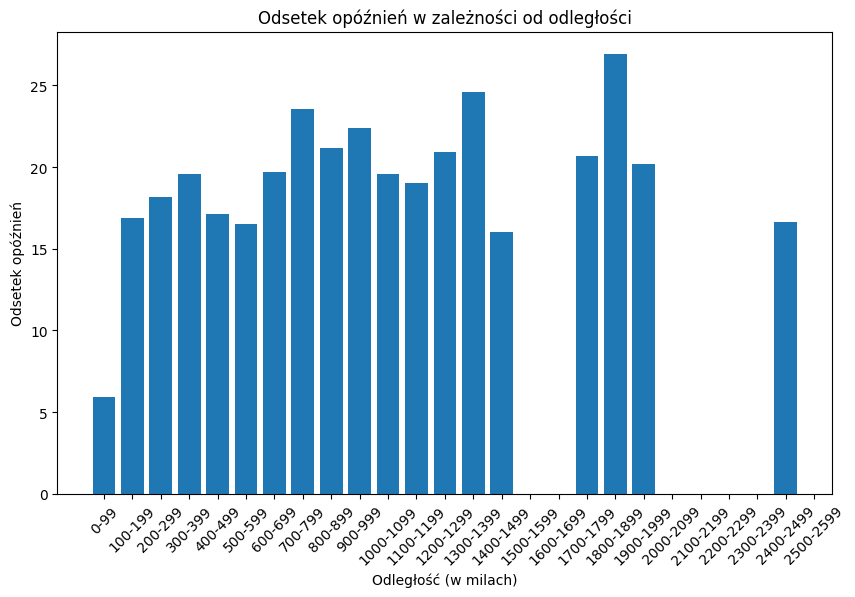

In [38]:
plt.figure(figsize=(10, 6))

plt.bar(flight_delays_by_distance_agg_df['Distance Range'], flight_delays_by_distance_agg_df['Delay Percentage'])

plt.xlabel('Odległość (w milach)')
plt.ylabel('Odsetek opóźnień')
plt.title('Odsetek opóźnień w zależności od odległości')
plt.xticks(rotation=45)

plt.show()

# wnioski: 
Istnieje zależność pomiędzy występowaniem opoźnień a dystansem. Wraz ze wzrostem dystansu obserwuje sie wzrost prawdopodobienstwa opoznienia lotu.

 # Opóźnienia vs. grupa odległości
 Analizując kolumnę `distance_group`określę charakterystyke grup.
 Wyznaczam prawdopodobieństwo opóźnienia w zależności od grupy. 

In [41]:
distance_group_stats = flight_df.groupby('distance_group')['distance'].agg(['min', 'max'])
distance_group_stats

,min,max
distance_group,,
1,100.0,239.0
2,255.0,480.0
3,544.0,746.0
4,762.0,967.0
5,1024.0,1235.0
6,1389.0,1448.0
7,1721.0,1744.0
8,1846.0,1947.0
10,2475.0,2475.0


Obliczenie odsetka opóźnień w każdej grupie zapisując wyniki do ramki `flight_delays_by_distance_group_df`

In [42]:
delay_percentages = flight_df.groupby('distance_group')['is_delayed'].mean() * 100

flight_distance_by_distance_group_df = pd.DataFrame(distance_group_stats)
flight_delays_by_distance_group_df = pd.DataFrame({'Distance Group': delay_percentages.index, 'Delay Percentage': delay_percentages})

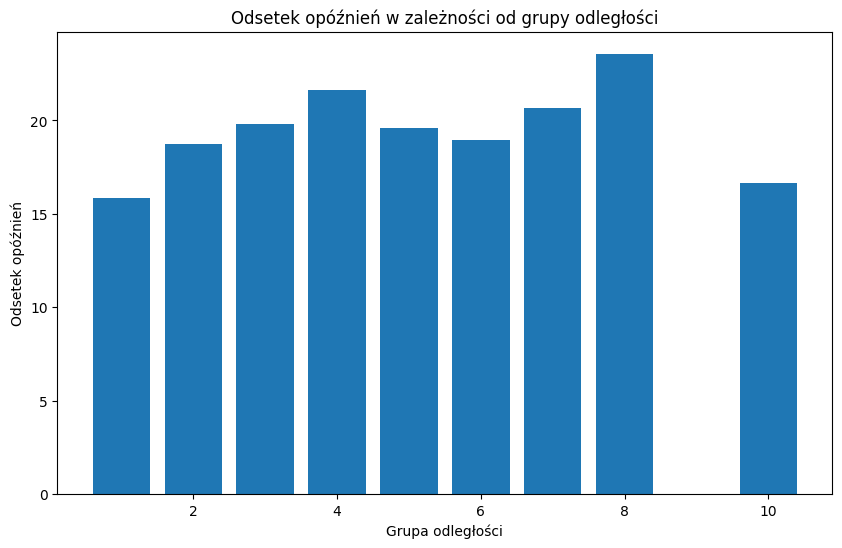

In [43]:
plt.figure(figsize=(10, 6))

plt.bar(flight_delays_by_distance_group_df['Distance Group'], flight_delays_by_distance_group_df['Delay Percentage'])

plt.xlabel('Grupa odległości')
plt.ylabel('Odsetek opóźnień')
plt.title('Odsetek opóźnień w zależności od grupy odległości')
plt.xticks(rotation=0)

plt.show()

Na wykresie widzę brak grupy 9, sprawdzam czy w niej nie ma opznień czy nie ma takiej grupy w df:

In [44]:
flight_df.loc[flight_df['distance_group']==9]

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg


 # Wnioski: 
 Podział na grupy daje takie same wnioski: na podstawie wykresu obserwuje się wzrost prawdopodobieństwa wystąpienia opoznienia lotu wraz ze wzrostem dystansu.

# Zapis ramki:

In [45]:
flight_df_01 = flight_df
flight_df_01.to_csv(
    r'..\data\processed\flight_df_01.csv',
    sep=';',
    decimal='.',
    index=False
)